<a href="https://colab.research.google.com/github/GusdPaula/postgraduation_fiap/blob/main/temporal_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install sktime

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for src
  Running setup.py clean for src
Failed to build src
ERROR: Could not build wheels for src, which is required to install pyproject.toml-based projects


In [61]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet

sys.path.append("..")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
matplotlib.rcParams["axes.formatter.limits"] = (-99, 99)

In [3]:
data_exp = pd.read_csv('/content/drive/MyDrive/pos_fiap/ExpVinho.csv', sep=";")
data_exp

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,0,0
133,134,Uruguai,0,0,0,0,0,0,0,0,...,6180,18497,0,0,136774,149842,637117,997367,326093,454271
134,135,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
135,136,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512


In [6]:
data_exp.set_index('País', inplace=True)

In [12]:
data_exp_vendas = data_exp[[col for col in data_exp.columns if '.1' in str(col)]]
data_exp_vendas

,1970.1,1971.1,1972.1,1973.1,1974.1,1975.1,1976.1,1977.1,1978.1,1979.1,...,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,95,21,0,0,698
"Alemanha, República Democrática",0,0,2630,8250,0,0,0,0,0,6500,...,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853
Angola,0,0,0,0,0,0,0,0,0,2387643,...,23124,17089,35390,61680,709,1065,0,0,4761,0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
Uruguai,0,0,0,0,0,0,0,720,5128,12285,...,0,0,0,0,29617,18497,0,149842,997367,454271
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,0,0,0


In [13]:
data_exp_vendas.columns = [col[:4] for col in data_exp_vendas.columns]
data_exp_vendas = data_exp_vendas.T
data_exp_vendas

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Arábia Saudita,Argentina,Aruba,...,Togo,Toquelau,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
1970,0,0,0,0,0,0,207,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,3705,0,0,0,...,0,0,0,0,0,0,0,0,2000,0
1972,0,0,2630,0,0,0,1936,0,0,0,...,0,0,0,0,0,0,0,0,750,0
1973,0,0,8250,0,0,0,0,0,0,0,...,0,0,300,0,0,0,0,0,6458,0
1974,0,0,0,0,0,0,0,0,0,0,...,0,0,563,0,0,0,0,0,5250,0
1975,0,0,0,0,0,0,1600,0,0,0,...,0,0,0,0,0,0,0,0,2488,0
1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,1813,0,0,0,720,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,2931,0,0,0,5128,0,0,0
1979,0,0,6500,2387643,0,0,1349,0,0,0,...,0,0,3050,0,0,0,12285,0,0,0


In [17]:
data_exp_vendas['Total'] = data_exp_vendas.sum(axis=1)
data_exp_vendas = data_exp_vendas['Total']

In [18]:
data_exp_vendas

1970       81000.0
1971      166930.0
1972      242194.0
1973      349584.0
1974      371742.0
1975      539162.0
1976      592338.0
1977      958552.0
1978      610838.0
1979     5610978.0
1980     3430074.0
1981      925860.0
1982      754402.0
1983      639290.0
1984      667822.0
1985     1330302.0
1986     3170146.0
1987     1677628.0
1988     3313838.0
1989     7881352.0
1990     7217774.0
1991     8523120.0
1992    15104730.0
1993    29721182.0
1994    25489666.0
1995    25192824.0
1996    29912648.0
1997    31587732.0
1998    11025356.0
1999     8148584.0
2000     6926554.0
2001     2626458.0
2002     2165878.0
2003     1345048.0
2004     3181226.0
2005     5132000.0
2006     5316214.0
2007     7372300.0
2008    14236200.0
2009    17881976.0
2010     5190606.0
2011     7230240.0
2012    11042586.0
2013    45489690.0
2014    14945590.0
2015     5538320.0
2016     8869408.0
2017    14271214.0
2018    14972126.0
2019    11869652.0
2020    12156576.0
2021    19703884.0
2022    2189

<Axes: >

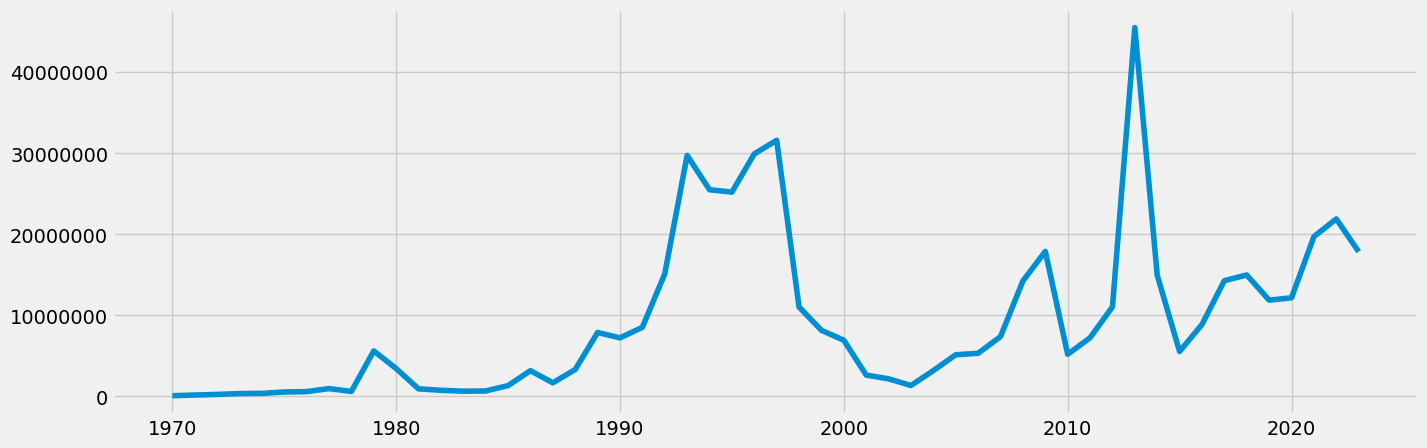

In [32]:
data_exp_vendas.plot(style='-', figsize=(15,5), color=color_pal[0])

In [31]:
data_exp_vendas.index = pd.to_datetime(data_exp_vendas.index).year
data_exp_vendas

1970       81000.0
1971      166930.0
1972      242194.0
1973      349584.0
1974      371742.0
1975      539162.0
1976      592338.0
1977      958552.0
1978      610838.0
1979     5610978.0
1980     3430074.0
1981      925860.0
1982      754402.0
1983      639290.0
1984      667822.0
1985     1330302.0
1986     3170146.0
1987     1677628.0
1988     3313838.0
1989     7881352.0
1990     7217774.0
1991     8523120.0
1992    15104730.0
1993    29721182.0
1994    25489666.0
1995    25192824.0
1996    29912648.0
1997    31587732.0
1998    11025356.0
1999     8148584.0
2000     6926554.0
2001     2626458.0
2002     2165878.0
2003     1345048.0
2004     3181226.0
2005     5132000.0
2006     5316214.0
2007     7372300.0
2008    14236200.0
2009    17881976.0
2010     5190606.0
2011     7230240.0
2012    11042586.0
2013    45489690.0
2014    14945590.0
2015     5538320.0
2016     8869408.0
2017    14271214.0
2018    14972126.0
2019    11869652.0
2020    12156576.0
2021    19703884.0
2022    2189

##Train/ Test Split

In [62]:
train_data, test_data = temporal_train_test_split(data_exp_vendas, train_size=0.8)

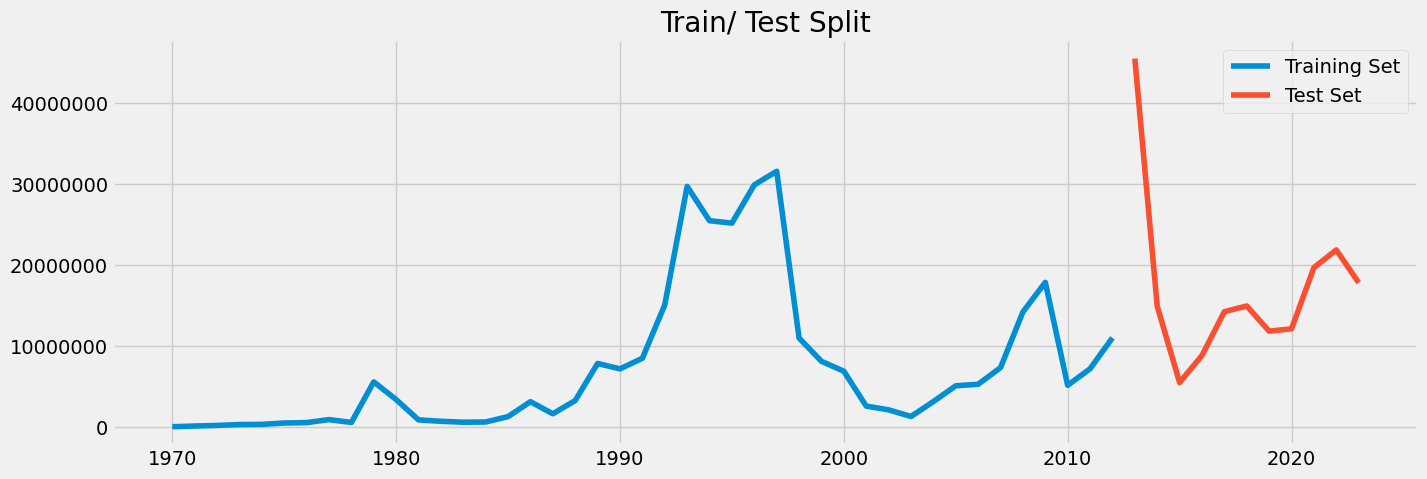

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
train_data.plot(ax=ax, label='Training Set', title='Train/ Test Split')
test_data.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

##Create our Model

In [74]:
fh = ForecastingHorizon(test_data.index, is_relative=False)

In [75]:
foracaster = ThetaForecaster()
foracaster.fit(train_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ThetaForecaster()

In [76]:
pred_data = foracaster.predict(fh)
pred_data

2013    1.131963e+07
2014    1.146734e+07
2015    1.161505e+07
2016    1.176275e+07
2017    1.191046e+07
2018    1.205817e+07
2019    1.220588e+07
2020    1.235358e+07
2021    1.250129e+07
2022    1.264900e+07
2023    1.279671e+07
Name: Total, dtype: float64

In [77]:
mean_absolute_percentage_error(test_data, pred_data)

0.35295942075541115

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Total'>)

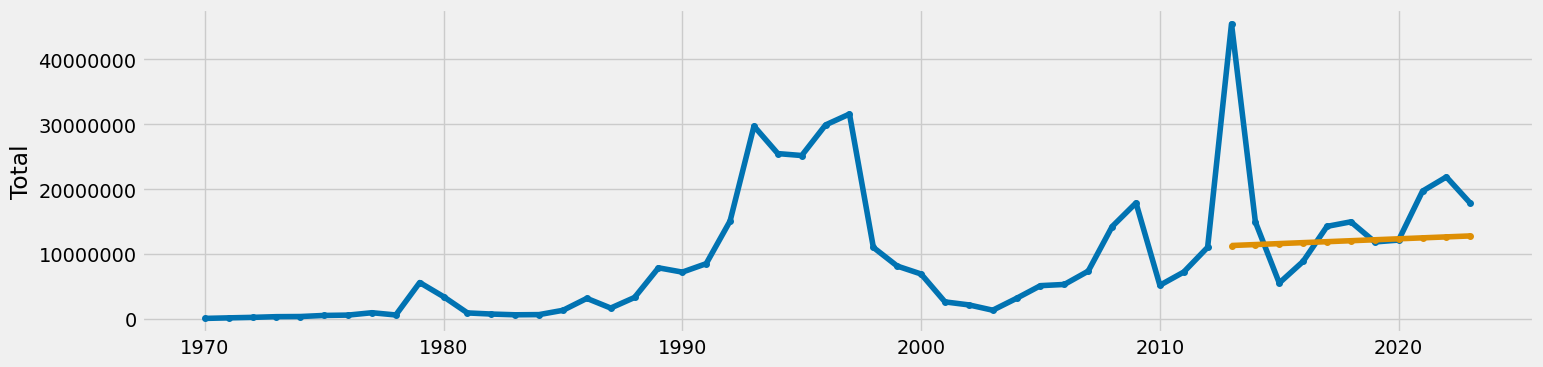

In [78]:
plot_series(data_exp_vendas, pred_data)

In [97]:
fh = ForecastingHorizon(pd.to_datetime([f'{year}-01-01' for year in range(2022, 2040)]).year, is_relative=False)

In [98]:
pred_data = foracaster.predict(fh)
pred_data

2022    1.264900e+07
2023    1.279671e+07
2024    1.294441e+07
2025    1.309212e+07
2026    1.323983e+07
2027    1.338754e+07
2028    1.353524e+07
2029    1.368295e+07
2030    1.383066e+07
2031    1.397837e+07
2032    1.412607e+07
2033    1.427378e+07
2034    1.442149e+07
2035    1.456919e+07
2036    1.471690e+07
2037    1.486461e+07
2038    1.501232e+07
2039    1.516002e+07
Name: Total, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Total'>)

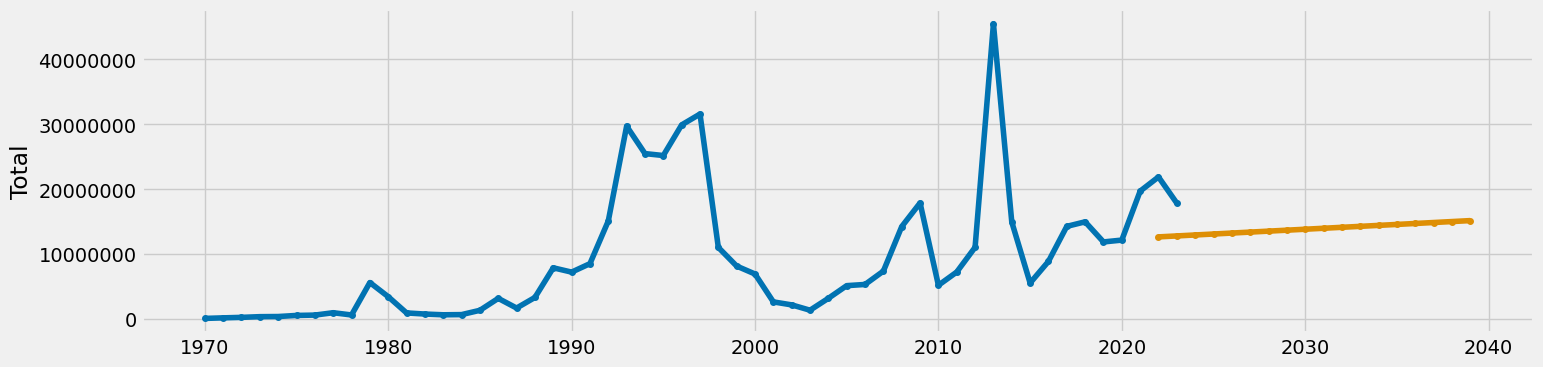

In [99]:
plot_series(data_exp_vendas, pred_data)